In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate mock data
np.random.seed(0)
X = np.random.randn(100, 1)
y = (X > 0).astype(np.float64).ravel()

In [3]:
def sigmoid(z):
 return 1 / (1 + np.exp(-z))

In [10]:
def cost_function(theta, X, y):
   m = len(y)
   predictions = sigmoid(np.dot(X, theta))
   error = (-y * np.log(predictions)) - ((1-y) * np.log(1-predictions))
   cost = 1/m * sum(error)
   # Ensure cost is an array
   if not isinstance(cost, np.ndarray):
      cost = np.array([cost])
   gradient = 1/m * np.dot(X.transpose(), (predictions - y))
   return cost[0], gradient

In [15]:
def gradient_descent(X, y, theta, alpha, num_iterations):
   m = len(y)
   cost_history = []

   for i in range(num_iterations):
     cost, gradient = cost_function(theta, X, y)
     theta -= alpha * gradient
     cost_history.append(cost)

   return theta, cost_history

In [16]:
#Add an intercept column to X
X = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.zeros(X.shape[1])
alpha = 0.01
num_iterations = 1000
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)
print(f"Estimated parameters: {theta}")

Estimated parameters: [0.17201048 1.87003478]


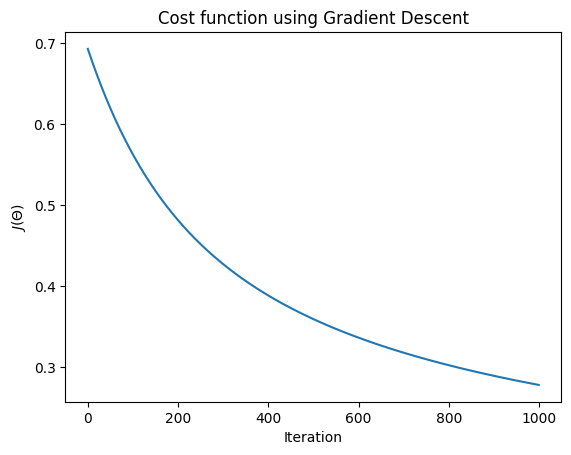

In [17]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()